# Food Delivery Time Prediction

The goals of this notebook are:

- Load the cleaned data created for testing
- Train different models
- Evaluate each model
- Compare them and choose the best

## Observations

- Ordinal Encoding for `Traffic_Level` improved the model.
- `RandomizedSearchCV` was chosen for hyperparameter tuning as it explores wide parameter spaces more efficiently than GridSearchCV.
- Used MAE (Mean Absolute Error) as the primary evaluation metric because consistent accuracy in typical cases is more valuable than edge cases. It provided better results compared to other metrics.

> This observations were done after all tests

In [3]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [4]:
SEED = 7
TARGET = "Delivery_Time_min"

random.seed(SEED)
np.random.seed(SEED)

In [5]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE : {mae:.2f} minutes")
    print(f"RMSE: {rmse:.2f} minutes")
    print(f"R²  : {r2:.3f}")


In [6]:
def xgb_importance(model, feature_names):
    importance = model.feature_importances_
    feat_imp = pd.DataFrame({
        "feature": feature_names,
        "importance": importance
    }).sort_values(by="importance", ascending=False)

    print(feat_imp)

    plt.figure(figsize=(7, 5))
    plt.barh(feat_imp["feature"], feat_imp["importance"])
    plt.gca().invert_yaxis()
    plt.title("XGBoost Feature Importance")
    plt.show()


## Model Training

### All Categorical Columns with One Hot Encoding

In [ ]:
df = pd.read_csv('../data/testing_data.csv')

In [ ]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED,
    n_jobs=-1
)

model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R²  : {r2:.3f}")


MAE : 7.53 minutes
RMSE: 11.04 minutes
R²  : 0.774


### With Ordinal Encoding for Traffic

In [30]:
df = pd.read_csv('../data/testing_data_ordinal.csv')

In [31]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [33]:
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED,
    n_jobs=-1
)

model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [34]:
evaluate(model, X_test, y_test)

MAE : 7.50 minutes
RMSE: 10.84 minutes
R²  : 0.782


                   feature  importance
1              Distance_km    0.263116
3     Preparation_Time_min    0.088186
8            Weather_Snowy    0.070437
5            Weather_Clear    0.069870
2            Traffic_Level    0.063737
11     Time_of_Day_Evening    0.050940
6            Weather_Foggy    0.050032
7            Weather_Rainy    0.041075
15        Vehicle_Type_Car    0.037882
16    Vehicle_Type_Scooter    0.037545
4   Courier_Experience_yrs    0.036774
13       Time_of_Day_Night    0.036137
14       Vehicle_Type_Bike    0.034638
0                 Order_ID    0.033857
12     Time_of_Day_Morning    0.032452
10   Time_of_Day_Afternoon    0.027723
9            Weather_Windy    0.025597


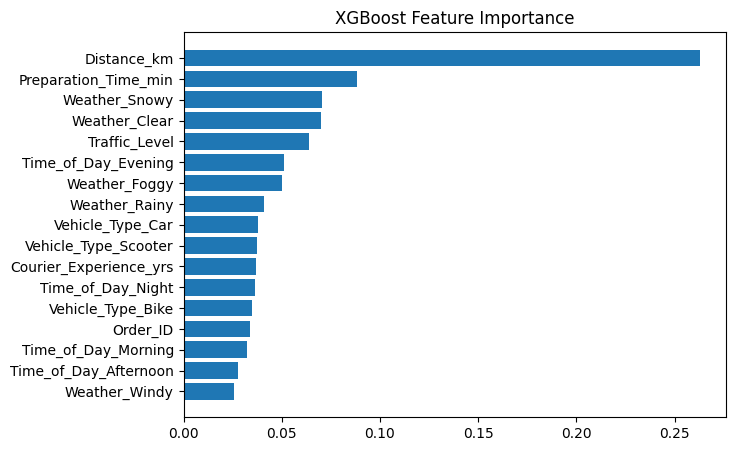

In [42]:
xgb_importance(model, X.columns)

## Tuning Hyper parameters

In [66]:
df = pd.read_csv('../data/testing_data_ordinal.csv')

In [67]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [74]:
xgb = xgb.XGBRegressor(objetive="reg:absoluteerror", random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": np.arange(100, 1000, 100),
    "max_depth": np.arange(3, 10),
    "learning_rate": np.linspace(0.01, 0.2, 10),
    "subsample": np.linspace(0.8, 1.0, 4),
    "min_child_weight": np.arange(1, 10),
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    random_state=SEED
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/jwhoami/Documents/01-projects/pg-internship/technical-assessment/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [00:56:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "objetive" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jwhoami/Documents/01-projects/pg-internship/technical-assessment/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [00:56:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "objetive" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jwhoami/Documents/01-projects/pg-internship/technical-assessment/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [00:56:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "objetive" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jwhoami/Documents/01-projects/pg-internship/technical-assessment/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [00:56:21]

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'learning_rate': array([0.01 ..., 0.2 ]), 'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'min_child_weight': array([1, 2, ..., 6, 7, 8, 9]), 'n_estimators': array([100, 2...00, 800, 900]), ...}"
,n_iter,50
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,7
,error_score,nan


In [75]:
print("Best Params:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Best Params: {'subsample': np.float64(1.0), 'n_estimators': np.int64(700), 'min_child_weight': np.int64(9), 'max_depth': np.int64(3), 'learning_rate': np.float64(0.03111111111111111)}
Best Score: -0.721798857053121


### With Best Hyper Parameter Tuning Found

In [7]:
df = pd.read_csv('../data/testing_data_ordinal.csv')

In [8]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [10]:
model = xgb.XGBRegressor(
    objective="reg:absoluteerror",
    n_estimators=700,
    learning_rate=0.0311,
    max_depth=3,
    subsample=1.0,
    min_child_weight=9,
    random_state=SEED,
    n_jobs=-1
)

model.fit(X_train, y_train)

,objective,'reg:absoluteerror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [11]:
evaluate(model, X_test, y_test)

MAE : 6.96 minutes
RMSE: 10.90 minutes
R²  : 0.780


                   feature  importance
1              Distance_km    0.159893
2            Traffic_Level    0.088763
8            Weather_Snowy    0.087840
3     Preparation_Time_min    0.087417
5            Weather_Clear    0.079742
9            Weather_Windy    0.056358
10   Time_of_Day_Afternoon    0.051314
4   Courier_Experience_yrs    0.049055
16    Vehicle_Type_Scooter    0.046716
7            Weather_Rainy    0.041556
6            Weather_Foggy    0.039547
11     Time_of_Day_Evening    0.038397
13       Time_of_Day_Night    0.037473
15        Vehicle_Type_Car    0.036483
14       Vehicle_Type_Bike    0.034182
12     Time_of_Day_Morning    0.033974
0                 Order_ID    0.031288


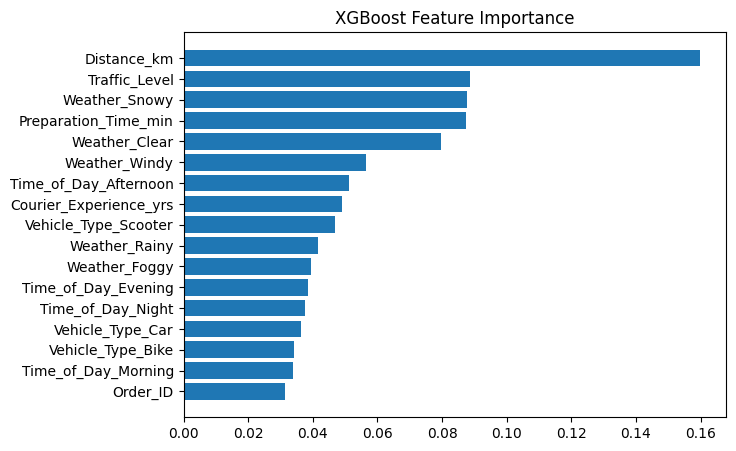

In [15]:
xgb_importance(model, X.columns)

### Error Insights

In [16]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

#### Residuals By Distance

In [21]:
X_test_copy = X_test.copy()
X_test_copy['Residuals'] = residuals
X_test_copy['Distance_Bucket'] = pd.cut(X_test_copy['Distance_km'],
                                        bins=[0, 2, 5, 10, np.inf],
                                        labels=['0-2', '2-5', '5-10', '10+'])

print(X_test_copy.groupby('Distance_Bucket', observed=True)['Residuals'].agg(['mean','std','count']))

                     mean        std  count
Distance_Bucket                            
0-2             -0.493255   1.935175     18
2-5             -0.648170   3.201135     32
5-10             2.744952  13.661757     42
10+              2.400021  11.755358    108


#### Residuals By Preparation Time

In [29]:
X_test_copy = X_test.copy()
X_test_copy['Residuals'] = residuals
X_test_copy['Bucket'] = pd.cut(X_test_copy['Preparation_Time_min'],
                                        bins=[0, 2, 5, 10, np.inf],
                                        labels=['0-2', '2-5', '5-10', '10+'])

print(X_test_copy.groupby('Bucket', observed=True)['Residuals'].agg(['mean','std','count']))

            mean        std  count
Bucket                            
2-5     1.956098  11.235114      6
5-10   -0.915935   7.048735     53
10+     2.706937  11.790102    141


#### Residuals By Weather

In [31]:
X_test_copy = X_test.copy()
X_test_copy['Residuals'] = residuals

# Collapse one-hot encoded weather columns into a single categorical
weather_cols = ['Weather_Clear', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Foggy', 'Weather_Windy']
X_test_copy['Weather'] = X_test_copy[weather_cols].idxmax(axis=1).str.replace('Weather_', '')

# Group residuals by reconstructed weather column
print(X_test_copy.groupby('Weather', observed=True)['Residuals'].agg(['mean','std','count']))


             mean        std  count
Weather                            
Clear    0.904347  10.222516    101
Foggy    7.280481  17.023091     21
Rainy    1.786639   9.250895     49
Snowy   -2.945846   7.794349     13
Windy    3.211987   8.421128     16


#### Residuals By Vehicle Type

In [34]:
X_test_copy = X_test.copy()
X_test_copy['Residuals'] = residuals

# Collapse one-hot encoded columns into a single categorical
vehicle_cols = ['Vehicle_Type_Bike', 'Vehicle_Type_Scooter', 'Vehicle_Type_Car']
X_test_copy['Vehicle_Type'] = X_test_copy[vehicle_cols].idxmax(axis=1).str.replace('Vehicle_Type_', '')

print(X_test_copy.groupby('Vehicle_Type', observed=True)['Residuals'].agg(['mean','std','count']))


                  mean        std  count
Vehicle_Type                            
Bike          1.051554  12.014777     98
Car           4.472533  11.637678     46
Scooter       0.644312   6.911726     56


#### Residuals By Traffic

In [37]:
X_test_copy = X_test.copy()
X_test_copy['Residuals'] = residuals

mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
X_test_copy['Traffic_Level_Label'] = X_test_copy['Traffic_Level'].map(mapping)

print(X_test_copy.groupby('Traffic_Level_Label', observed=True)['Residuals'].agg(['mean','std','count']))

                         mean        std  count
Traffic_Level_Label                            
High                 0.668829   8.249342     79
Low                  3.462421  12.755563     43
Medium               1.835239  11.854689     78


### Worst offenders

In [41]:
X_test_copy = X_test.copy()
X_test_copy['Residuals'] = residuals

worst_cases = X_test_copy.assign(actual=y_test, predicted=y_pred)
worst_cases['abs_error'] = worst_cases['Residuals'].abs()

pd.set_option('display.max_columns', None)
worst_cases.nlargest(5, 'abs_error')

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Residuals,actual,predicted,abs_error
140,45,5.55,0.0,18,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,62.488224,116,53.511776,62.488224
127,446,18.97,1.0,25,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,58.409744,141,82.590256,58.409744
467,418,6.91,1.0,27,8.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,41.921352,91,49.078648,41.921352
930,565,7.34,2.0,22,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,37.396599,93,55.603401,37.396599
541,272,16.30,1.0,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31.658119,100,68.341881,31.658119
